In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from   astropy.table import Table

In [4]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [23]:
from   vmaxer import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod, volcom
from   lumfn import lumfn
from   schechter import named_schechter

In [24]:
gama_zmax = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_zmax.fits')
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
209748,587725074990104938,134.80169161,0.00541943,17.670448,0.16614,5,528071002781935616,6,20.69154,18.777487,17.623806,17.12555,16.7443,561.963526479418,38.74854064579229,G9,336.6895087963473,-344.77276732721725,-0.29201119712561685,1.1536808,0.9656032703681418,0,6,-0.012802438816760256,0.17527509220669957,0.21718717039995156,0.5670456235874188,0.8038223482041342,0.8,-0.1611558,-0.13291201,-21.134123707977864,-21.162367503015133,38.80457201120052,38.83281580623779,2.129551,0.3654359406240779,0.0,-5.6704483,0.014117166402440595,0.0
537129,588848898840789129,184.21539209,-1.03669489,16.961576,0.07156,5,324336722294892544,6,19.626896,17.806122,16.912678,16.516546,16.241358,226.73735426434604,36.777615373338456,G12,211.10784811178928,13.778240299502608,-4.0400222378383175,0.89344406,0.9590927322944667,0,6,-0.14128247488344584,-0.20693114589861566,0.08799718779518459,0.1837785822606589,0.7976626668138226,0.8,-0.06941321,-0.057248004,-19.83462289187028,-19.846788095560807,36.79619935366227,36.808364557352796,2.8384228,0.22859104799958965,0.0,-4.9615765,0.00775015660264215,0.0
382081,587727944027472289,135.23306993,1.95568309,19.110462,0.22654,4,G09_Y2_021_035,6,21.606937,20.09877,19.122538,18.54879,18.2157,795.6858082015166,39.50370806041515,G9,456.48158760084635,-460.4315484359427,21.680969625684444,0.9762325,0.6972784121110702,0,5,-0.0013580076341729863,0.2775961089412802,0.2218401822645188,0.5776936646998119,0.6203790462512304,2.12,-0.2197438,-0.48026478,-20.395342250815464,-20.134821271053386,39.50580443953617,39.24528345977409,0.68953705,0.3112293363187196,0.0,-7.110462,0.008875135483098399,0.0
561801,588848899377922344,184.87290284,-0.54973036,19.31083,0.23925,4,G12_Y3_013_281,6,21.496574,20.378784,19.279503,18.788294,18.447803,846.7071391866866,39.63866610815502,G12,681.1973144334473,52.315729708895546,-7.238360697540164,1.0992813,0.7660327047680001,0,5,0.03335448706113034,0.3666030933282865,0.26124136733428505,0.6921762951172632,0.6683463832521781,0.8,-0.23207252,-0.1914,-20.35700579561584,-20.39767830647819,39.6678349582135,39.70850746907585,0.48917007,0.2894669815220143,0.0,-7.310829,0.009954037561673866,0.0
227206,587726014009442667,212.57882544,1.21256973,19.320875,0.25749,4,G15_Y3_017_043,6,22.189722,20.593586,19.20445,18.61652,18.272427,921.0087985140573,39.82131889543513,G15,620.3405500570348,389.0924449752832,14.877260726360266,1.3891354,0.9286639809620368,0,6,0.10993538643000941,0.5704067661857459,0.3364772018215463,0.9552430704775848,0.7703694920617349,0.8,-0.24976532,-0.20599201,-20.587155607797634,-20.630928916193973,39.90803077564431,39.95180408404065,0.47912407,0.3068173122068778,0.0,-7.320875,0.011085699544691588,0.0
363681,587726033340137638,220.75196667,2.46013928,18.085209,0.12255,4,G15_Y4_230_347,6,20.76381,19.052786,18.098398,17.709585,17.417257,402.634402533013,38.02455439911109,G15,273.43431062882456,231.635870153189,15.121871374437344,0.95438766,0.8986876414461394,0,6,-0.07503904401220754,-0.019339020663425008,0.1520469037953717,0.3545976030376719,0.7518369655526217,0.8,-0.11887351,-0.09804001,-19.972518903299758,-19.99335240302939,38.05772779612202,3

In [7]:
gama_vmax = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_vmax.fits')
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,VMAX,VZ
,,,mag,,
float32,float64,float64,float64,float64,float64
0.16614,0.03903000056743622,0.26298999786376953,-21.162367503015133,7594841.842906496,2016766.2298656115
0.07156,0.03903000056743622,0.22859104799958965,-19.846788095560807,5091162.529438256,144517.03304174222
0.22654,0.03903000056743622,0.26298999786376953,-20.134821271053386,7594841.842906496,4961195.402001622
0.23925,0.03903000056743622,0.26298999786376953,-20.39767830647819,7594841.842906496,5800833.970988336
0.25749,0.03903000056743622,0.26298999786376953,-20.630928916193973,7594841.842906496,7152345.061617714
0.12255,0.03903000056743622,0.24336693024614042,-19.99335240302939,6090561.986222616,814742.3434326942
0.21044,0.03903000056743622,0.26298999786376953,-19.815890111616465,7594841.842906496,4012820.519225561
0.06787,0.03903000056743622,0.06954882087785143,-16.845152495077468,130513.66754962779,119411.57987199114


Text(0.5, 0, 'ZMAX')

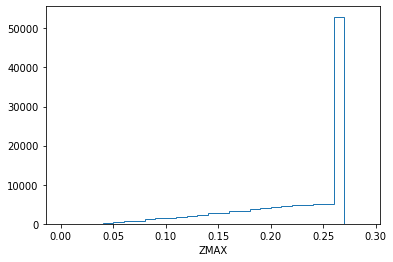

In [8]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [9]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03903   , 0.03981007])

Text(0, 0.5, 'ZMAX')

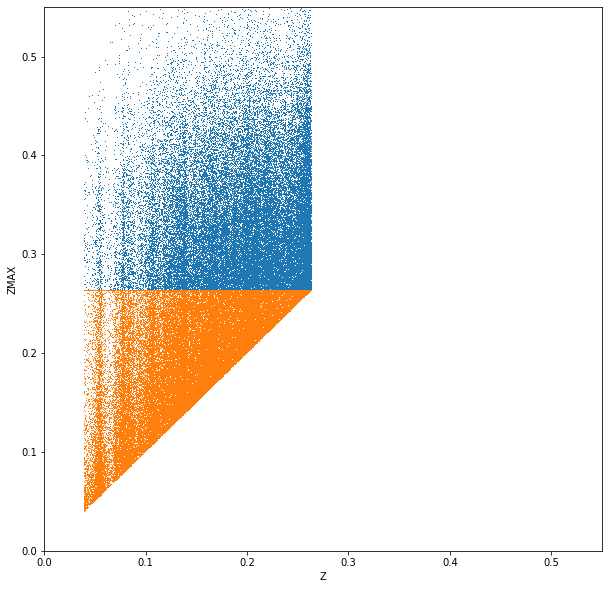

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZGAMA'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZGAMA'], gama_vmax['ZMAX'], marker=',', lw=0.0)
'''
ax.axvline(zmin, c='k', lw=0.5) 
ax.axvline(zmax, c='k', lw=0.5) 

ax.axhline(zmin, c='k', lw=0.5) 
ax.axhline(zmax, c='k', lw=0.5) 
'''
ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 0.55)

ax.set_xlabel('Z')
ax.set_ylabel('ZMAX')

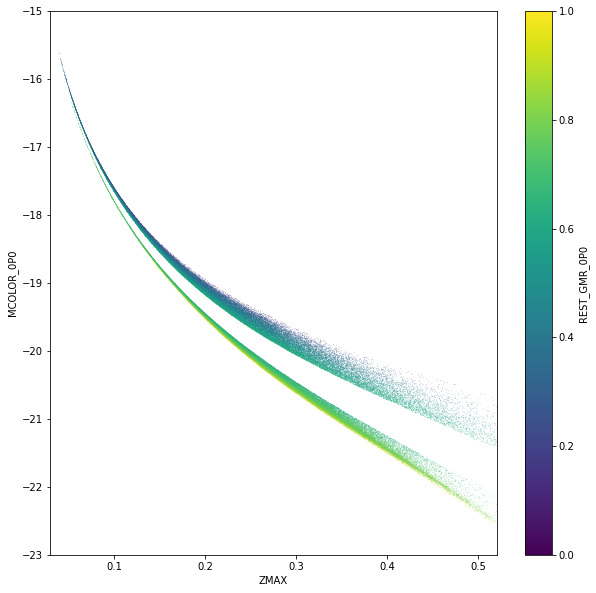

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc=ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)
# ax.plot(gama_vmax['ZMAX'], gama_vmax['MCOLOR_0P0'], marker=',', lw=0.0)

ax.set_xlim(0.03, 0.52)
ax.set_ylim(-23., -15.)

ax.set_xlabel('ZMAX')
ax.set_ylabel('MCOLOR_0P0')

plt.colorbar(sc, label='REST_GMR_0P0')

Text(0, 0.5, 'DEC')

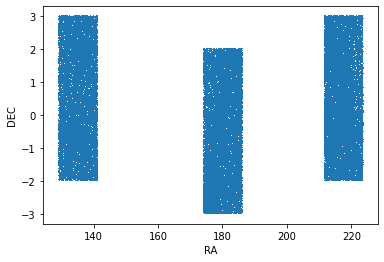

In [12]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlabel('RA')
pl.ylabel('DEC')

In [14]:
gama_lf = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_lumfn.fits')
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--


/tmp/ipykernel_40642/1547313978.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='No weights', alpha=0.4)
/tmp/ipykernel_40642/1547313978.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX')


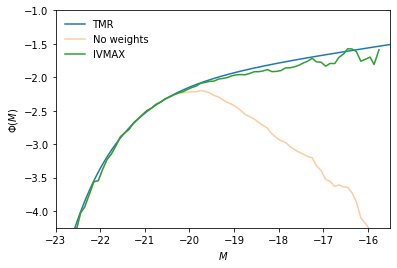

In [18]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR')

pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='No weights', alpha=0.4)
pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX')

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)

Text(0.5, 0, '(V/VMAX)')

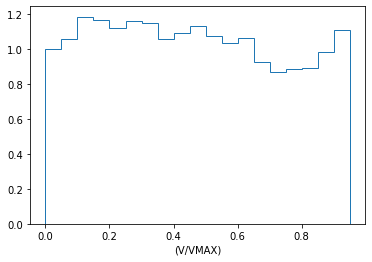

In [19]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)
pl.xlabel('(V/VMAX)')

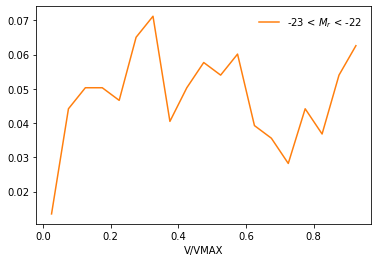

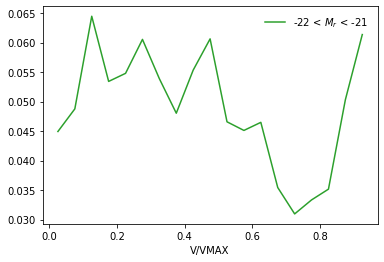

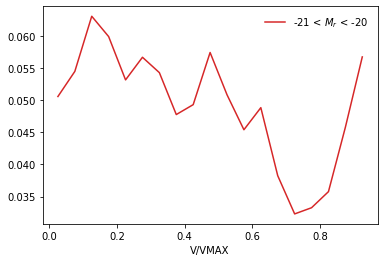

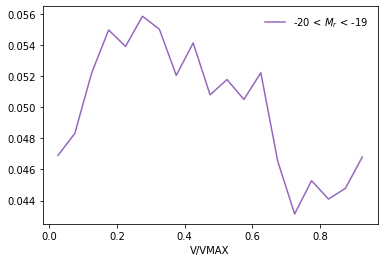

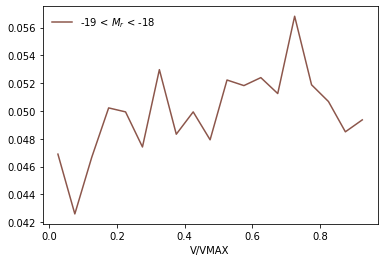

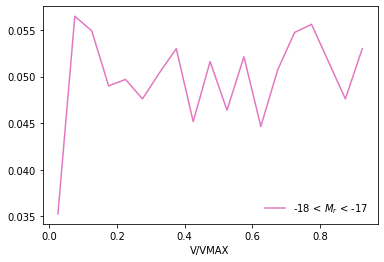

In [20]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.0, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'{:.0f} < $M_r$ < {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [21]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
185322,587725041702469675,179.83440251,-1.64817036,14.160493,0.08135,5,372775163474765824,6,17.064615,15.692654,14.905519,14.343366,14.213043,259.6079029836754,37.07158954561004,G12,239.95593630894075,-2.7092935591663565,-7.1457227418616585,0.7871351,0.8222150124783408,0,5,-0.12544319185352298,-0.160523080125354,0.10303089196510218,0.18560737233721386,0.7045586438344313,0.8,-0.0789095,-0.06508,-22.935218039108076,-22.949047538591184,37.09571093614177,37.10954043562488,5.6395063,-99.0,2.0,-2.160493,0.03154120966707457,0.0
178839,587725041166581794,182.1835035,-2.07231294,14.328211,0.10734,4,G12_Y6_041_249,6,24.575645,17.823496,16.785114,15.850774,18.088587,348.95950671254064,37.71387517159247,G12,314.7764615969768,9.35496746422525,-11.711092038957487,1.0383816,1.0190980480456595,0,6,-0.09298329526027885,-0.07369976676785223,0.14283969236353414,0.32678700770193425,0.8544342611996858,0.8,-0.1041198,-0.085872,-23.424384233236342,-23.442632031321555,37.75259506392482,37.770842862010035,5.4717884,-99.0,2.0,-2.3282108,0.039334234229219986,0.0
125489,587724649258876969,184.17810296,-2.69967347,14.425353,0.25162,4,G12_Y4_203_103,6,15.559951,15.755173,14.309496,28.205227,16.762774,896.9591792306916,39.76386339337955,G12,714.3194415688174,46.155514435440104,-34.47047148430874,1.4456768,0.9922763000644923,0,6,0.11573660675273972,0.5691371102771148,0.34863479662419555,0.9652536473961288,0.829057952816934,0.8,-0.24407141,-0.201296,-25.44307373066556,-25.48584913809907,39.868426780897494,39.911202188331,5.374646,-99.0,2.0,-2.425353,0.09538586652718395,0.0
718921,587726031728017438,217.2773885,1.28502947,14.456577,0.08647,3,NED_MRK_1383,4,14.399254,14.418312,14.378856,13.8610735,14.046887,276.9712644440074,37.212173568413235,G15,204.09321717251248,152.65545385094066,5.512399344915336,0.039456367,0.05020904994649686,0,1,-0.0982779198530405,-0.10903060230686158,0.06300279945333358,0.018814009181763167,0.08364515776424619,2.12,-0.0838759,-0.1833164,-22.734723164844088,-22.635282672154478,37.19130046586948,37.09185997317987,5.343422,1.1327446851177603,1.0,-2.4565773,0.027777561711799695,0.0
423776,587728879796093009,137.38205797,2.9559053,14.904024,0.14906,4,G09_Y1_FX1_283,6,16.738531,15.69086,14.949677,14.424865,14.620418,498.5745074806278,38.488650344529816,G9,316.42056432935635,-296.0721303565518,22.05771769704219,0.7411823,0.6530574215121244,0,4,-0.0658698376204572,0.022255068137926215,0.15431270736417704,0.30596734437310263,0.5895276902615822,2.12,-0.1445882,-0.31600717,-23.594350725510402,-23.42293176064758,38.49837484965591,38.32695588479309,4.895975,1.0458491090380897,1.0,-2.9040241,0.03981006674260368,0.0
402898,587728308032700482,177.930413,1.9912852,15.154907,0.07667,5,579904457131714560,6,16.842907,15.722559,15.199033,14.873966,14.68127,243.84026700789565,36.935527126086086,G12,226.1230519575173,-10.073505428494197,7.64275717306627,0.5235262,0.549579180178585,0,4,-0.1197763995197219,-0.14582938798677653,0.08788865133758171,0.10089048529106931,0.5105243577579381,2.12,-0.0743699,-0.16254039,-21.7941386509326,-21.705968159773636,36.949045877495095,36.86087538633613,4.645092,0.63631743093

In [22]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64


# Done.